In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Q1(a)

X = np.array([[0, 2], [1, 0], [3, 4]], dtype=float)

print("X: ", X)

print("X.T @ X: ", X.T @ X)

# Eigendecomposition of X.T @ X
eigenvalues, eigenvectors = np.linalg.eig(X.T @ X)

print("Eigenvalues: ", eigenvalues)
print("Eigenvectors: ", eigenvectors)

# SVD of X:
U, S, VT = np.linalg.svd(X)

print("U: ", U)
print("S: ", S)
print("V: ", VT.T)


X:  [[0. 2.]
 [1. 0.]
 [3. 4.]]
X.T @ X:  [[10. 12.]
 [12. 20.]]
Eigenvalues:  [ 2. 28.]
Eigenvectors:  [[-0.83205029 -0.5547002 ]
 [ 0.5547002  -0.83205029]]
U:  [[-0.31448545  0.78446454 -0.53452248]
 [-0.10482848 -0.58834841 -0.80178373]
 [-0.94345635 -0.19611614  0.26726124]]
S:  [5.29150262 1.41421356]
V:  [[-0.5547002  -0.83205029]
 [-0.83205029  0.5547002 ]]


In [3]:
# Q1(b)

# Power Method for A = X @ X.T
A = X @ X.T

x0 = np.array([1, 0, 0])

x1 = A @ x0
print("x1: ", x1)
print("x1 norm: ", np.linalg.norm(x1))
x1 = x1 / np.linalg.norm(x1)
print("normalized x1: ", x1)

x2 = A @ x1
print("x2: ", x2)
print("x2 norm: ", np.linalg.norm(x2))
x2 = x2 / np.linalg.norm(x2)
print("normalized x2: ", x2)

# Approximate Eigenvalue for A

lambda1 = x2.T @ A @ x2 / (x2.T @ x2)
print("Approximate Eigenvalue for A: ", lambda1)


x1:  [4. 0. 8.]
x1 norm:  8.94427190999916
normalized x1:  [0.4472136  0.         0.89442719]
x2:  [ 8.94427191  2.68328157 25.93838854]
x2 norm:  27.568097504180447
normalized x2:  [0.32444284 0.09733285 0.94088424]
Approximate Eigenvalue for A:  27.995789473684212


In [4]:
# Q4(a) Centering the data

# how busy the station is (rides per day)
daily_rentals = np.array([1100, 950, 800, 420, 380, 500, 700, 300], dtype=float)
# typical trip duration in minutes
avg_trip_min = np.array([14, 16, 18, 45, 52, 40, 20, 55], dtype=float)
# 0 to 1, proportion of weekend rides (tourism / leisure)
weekend_share = np.array([0.22, 0.25, 0.28, 0.75, 0.78, 0.70, 0.35, 0.8], dtype=float)
# avg user satisfaction
user_rating = np.array([4.0, 3.9, 4.1, 4.7, 4.8, 4.6, 4.2, 4.7], dtype=float)

# Create data matrix (8x4)
X = np.column_stack([daily_rentals, avg_trip_min, weekend_share, user_rating])

# Create centering matrix and center the data
n = X.shape[0]
ones = np.ones((n, 1))
Cn = np.eye(n) - (1 / n) * (ones @ ones.T)
A = Cn @ X  # Centered matrix (8x4)

print("Original X shape:", X.shape)
print("Centering matrix Cn shape:", Cn.shape)
print("Centered X shape:", A.shape)
print("\nCentered data:\n", A)

# Verify: column means should be ~0
print("\nColumn means (should be ~0):", A.mean(axis=0))

Original X shape: (8, 4)
Centering matrix Cn shape: (8, 8)
Centered X shape: (8, 4)

Centered data:
 [[ 4.5625e+02 -1.8500e+01 -2.9625e-01 -3.7500e-01]
 [ 3.0625e+02 -1.6500e+01 -2.6625e-01 -4.7500e-01]
 [ 1.5625e+02 -1.4500e+01 -2.3625e-01 -2.7500e-01]
 [-2.2375e+02  1.2500e+01  2.3375e-01  3.2500e-01]
 [-2.6375e+02  1.9500e+01  2.6375e-01  4.2500e-01]
 [-1.4375e+02  7.5000e+00  1.8375e-01  2.2500e-01]
 [ 5.6250e+01 -1.2500e+01 -1.6625e-01 -1.7500e-01]
 [-3.4375e+02  2.2500e+01  2.8375e-01  3.2500e-01]]

Column means (should be ~0): [0.00000000e+00 0.00000000e+00 1.38777878e-17 2.22044605e-16]


In [5]:
# Q4(b) Applying PCA for first 2 PCs

# Perform reduced SVD: A = U S V^T
U, S, VT = np.linalg.svd(A, full_matrices=False)
V = VT.T  # Transpose to get V (4x4)

print("A shape (centered data):", A.shape)
print("U shape:", U.shape)
print("S shape (singular values):", S.shape)
print("V shape:", V.shape)
print("\nSingular values:", S)

# Project data onto first 2 principal components
# A @ V[:, :2] gives us the projection
A_pca = A @ V[:, :2]  # (8x4) @ (4x2) = (8x2)

print("\n" + "=" * 50)
print("TRANSFORMED DATA (8x2 matrix):")
print("=" * 50)
print(A_pca)
print("\nShape:", A_pca.shape)

# Explained variance
explained_variance_ratio = (S**2) / np.sum(S**2)
print("\n" + "=" * 50)
print("EXPLAINED VARIANCE:")
print("=" * 50)
print(
    f"PC1: {explained_variance_ratio[0]:.4f} ({explained_variance_ratio[0]*100:.4f}%)"
)
print(
    f"PC2: {explained_variance_ratio[1]:.4f} ({explained_variance_ratio[1]*100:.4f}%)"
)
print(
    f"Total (first 2 PCs): {explained_variance_ratio[:2].sum():.4f} ({explained_variance_ratio[:2].sum()*100:.4f}%)"
)

A shape (centered data): (8, 4)
U shape: (8, 4)
S shape (singular values): (4,)
V shape: (4, 4)

Singular values: [7.68027155e+02 1.42523360e+01 2.25713037e-01 7.29851056e-02]

TRANSFORMED DATA (8x2 matrix):
[[-4.56567238e+02 -7.27282337e+00]
 [-3.06693576e+02 -8.02835210e-01]
 [-1.56819558e+02  5.66295933e+00]
 [ 2.24099190e+02  1.42283167e-01]
 [ 2.64430511e+02 -4.58967854e+00]
 [ 1.43944445e+02  6.20569152e-01]
 [-5.68659296e+01  9.30786141e+00]
 [ 3.44472155e+02 -3.06833594e+00]]

Shape: (8, 2)

EXPLAINED VARIANCE:
PC1: 0.9997 (99.9656%)
PC2: 0.0003 (0.0344%)
Total (first 2 PCs): 1.0000 (100.0000%)



PART (c): CLASSICAL MDS
Distance matrix D (8x8):
[[  0.         150.01336907 300.02668815 680.70681714 721.00274174
  600.56356067 400.04506859 801.05045184]
 [150.01336907   0.         150.01346906 530.79364163 571.13666569
  450.64031389 250.03219793 651.16967259]
 [300.02668815 150.01346906   0.         380.95876535 421.37482127
  300.80629382 100.02007249 501.36775963]
 [680.70681714 530.79364163 380.95876535   0.          40.60801522
   80.15617568 281.11458518 120.41595617]
 [721.00274174 571.13666569 421.37482127  40.60801522   0.
  120.59869983 321.59686706  80.05629519]
 [600.56356067 450.64031389 300.80629382  80.15617568 120.59869983
    0.         200.99821517 200.56176106]
 [400.04506859 250.03219793 100.02007249 281.11458518 321.59686706
  200.99821517   0.         401.52889373]
 [801.05045184 651.16967259 501.36775963 120.41595617  80.05629519
  200.56176106 401.52889373   0.        ]]

D shape: (8, 8)

Matrix B (double-centered, 8x8):
[[ 208506.54088906  140032.0695015

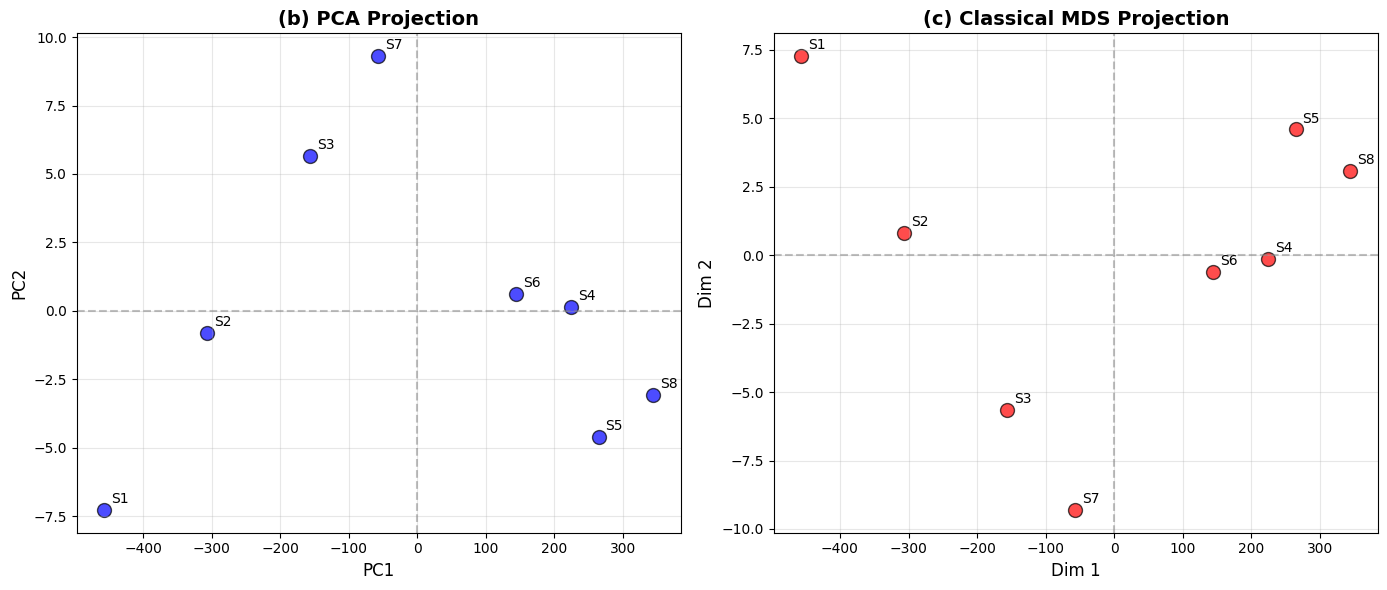


INTERPRETATION


In [6]:
# Q4(c)

# Step 1: Compute pairwise distance matrix D
D = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        D[i, j] = np.linalg.norm(A[i] - A[j])

print("\n" + "=" * 60)
print("PART (c): CLASSICAL MDS")
print("=" * 60)
print("Distance matrix D (8x8):")
print(D)
print("\nD shape:", D.shape)

# Step 2: Compute squared distance matrix
D_squared = D**2

# Step 3: Double centering to get B
# B = -0.5 * Cn @ D² @ Cn
B = -0.5 * Cn @ D_squared @ Cn

print("\nMatrix B (double-centered, 8x8):")
print(B)

# Step 4: Eigendecomposition of B
eigenvalues, eigenvectors = np.linalg.eigh(B)

# Sort in descending order
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

print("\nEigenvalues:", eigenvalues)

# Step 5: cMDS projection (first 2 dimensions)
# A_mds = eigenvectors[:, :2] @ sqrt(eigenvalues[:2])
A_mds = eigenvectors[:, :2] @ np.diag(np.sqrt(np.maximum(eigenvalues[:2], 0)))

print("\nTransformed data via cMDS (8x2):")
print(A_mds)

# ============================================================
# COMPARISON
# ============================================================
print("\n" + "=" * 60)
print("COMPARISON: PCA vs cMDS")
print("=" * 60)
print("\nPCA projection:")
print(A_pca)
print("\ncMDS projection:")
print(A_mds)

# Check if they're the same up to sign/reflection
print("\nAre they identical (up to sign)?")
# Compare absolute values or check correlation
correlation_pc1 = np.corrcoef(A_pca[:, 0], A_mds[:, 0])[0, 1]
correlation_pc2 = np.corrcoef(A_pca[:, 1], A_mds[:, 1])[0, 1]
print(f"Correlation PC1: {correlation_pc1:.6f}")
print(f"Correlation PC2: {correlation_pc2:.6f}")

# ============================================================
# VISUALIZATION
# ============================================================
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot PCA
axes[0].scatter(
    A_pca[:, 0], A_pca[:, 1], s=100, alpha=0.7, c="blue", edgecolors="black"
)
for i in range(n):
    axes[0].annotate(
        f"S{i+1}",
        (A_pca[i, 0], A_pca[i, 1]),
        xytext=(5, 5),
        textcoords="offset points",
        fontsize=10,
    )
axes[0].axhline(y=0, color="gray", linestyle="--", alpha=0.5)
axes[0].axvline(x=0, color="gray", linestyle="--", alpha=0.5)
axes[0].set_xlabel("PC1", fontsize=12)
axes[0].set_ylabel("PC2", fontsize=12)
axes[0].set_title("(b) PCA Projection", fontsize=14, fontweight="bold")
axes[0].grid(True, alpha=0.3)

# Plot cMDS
axes[1].scatter(A_mds[:, 0], A_mds[:, 1], s=100, alpha=0.7, c="red", edgecolors="black")
for i in range(n):
    axes[1].annotate(
        f"S{i+1}",
        (A_mds[i, 0], A_mds[i, 1]),
        xytext=(5, 5),
        textcoords="offset points",
        fontsize=10,
    )
axes[1].axhline(y=0, color="gray", linestyle="--", alpha=0.5)
axes[1].axvline(x=0, color="gray", linestyle="--", alpha=0.5)
axes[1].set_xlabel("Dim 1", fontsize=12)
axes[1].set_ylabel("Dim 2", fontsize=12)
axes[1].set_title("(c) Classical MDS Projection", fontsize=14, fontweight="bold")
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================
# INTERPRETATION
# ============================================================
print("\n" + "=" * 60)
print("INTERPRETATION")
print("=" * 60)

Key Findings:

1. **Mathematical Equivalence**:
   - PCA and cMDS are mathematically equivalent when applied to
   centered Euclidean distances. They produce the same configuration
   up to rotation/reflection.

2. **Why they match**:
   - PCA: A = U Σ V^T, projection = U[:,:2] @ Σ[:2]
   - cMDS: B = A @ A^T (Gram matrix), eigendecomposition gives U @ Σ²
   - Both recover the same low-dimensional representation

3. **Station groupings** (visible in plots):
   - High-traffic urban stations (S1, S2, S3, S7): One cluster
   - Low-traffic leisure stations (S4, S5, S6, S8): Another cluster

<!-- 4. **Practical difference**:
   - PCA: Works directly with features (requires centered data)
   - cMDS: Works with distance matrix (can use any distance metric)
   - cMDS more flexible for non-Euclidean distances -->



In [7]:
# Q5(a) Filling missing entries with row means

P = np.array(
    [
        [50, np.nan, 60, np.nan],
        [np.nan, 40, np.nan, 35],
        [65, np.nan, 75, np.nan],
        [np.nan, 45, np.nan, 38],
        [55, np.nan, 65, np.nan],
        [np.nan, 42, np.nan, 36],
    ],
    dtype=float,
)

# Create a copy to preserve original P
X0 = P.copy()

# Calculate row means (ignoring NaN)
row_means = np.nanmean(X0, axis=1)

# Find NaN positions
nan_mask = np.isnan(X0)

# Replace NaN with corresponding row means
for i in range(X0.shape[0]):
    X0[i, nan_mask[i]] = row_means[i]

print("Original P:")
print(P)
print("\nNew matrix X0:")
print(X0)

Original P:
[[50. nan 60. nan]
 [nan 40. nan 35.]
 [65. nan 75. nan]
 [nan 45. nan 38.]
 [55. nan 65. nan]
 [nan 42. nan 36.]]

New matrix X0:
[[50.  55.  60.  55. ]
 [37.5 40.  37.5 35. ]
 [65.  70.  75.  70. ]
 [41.5 45.  41.5 38. ]
 [55.  60.  65.  60. ]
 [39.  42.  39.  36. ]]


In [8]:
# Q5(b)

# (i) Compute reduced SVD for X0

U0, s0, V0T = np.linalg.svd(X0, full_matrices=False)

print("U0: ", U0)
print("s0: ", s0)
print("V0: ", V0T)

# (ii) Apply singular value shrinkage with lambda = 10
lambda_shrink = 10
s_shrunk = np.maximum(s0 - lambda_shrink, 0)
S_shrunk = np.diag(s_shrunk)

# (iii) Reconstruct matrix with shrunk singular values
X_shrunk = U0 @ S_shrunk @ V0T

# Create X1: keep observed values from P, fill missing with X_shrunk
X1 = P.copy()
X1[nan_mask] = X_shrunk[nan_mask]

print("\nOriginal P:")
print(P)
print("\nX_shrunk:")
print(X_shrunk)
print("\nX1 (observed from P, missing from X_shrunk):")
print(X1)

U0:  [[-0.43277315  0.33898102  0.55961381  0.61870833]
 [-0.29452291 -0.42186388 -0.36052169  0.35999298]
 [-0.55049603  0.27704168 -0.62786548  0.04123158]
 [-0.32600196 -0.54518725  0.36608778 -0.22031522]
 [-0.47201411  0.31833457  0.16378738 -0.65993991]
 [-0.30633834 -0.48146092  0.04236569 -0.04295972]]
s0:  [2.54596742e+02 9.08443682e+00 9.85969201e-01 5.75761038e-15]
V0:  [[-0.47095089 -0.51051442 -0.52811121 -0.48854768]
 [-0.52364069 -0.49451522  0.50488456  0.47575909]
 [-0.50398977  0.49480272  0.4649625  -0.53382998]
 [-0.5         0.5        -0.5         0.5       ]]

Original P:
[[50. nan 60. nan]
 [nan 40. nan 35.]
 [65. nan 75. nan]
 [nan 45. nan 38.]
 [55. nan 65. nan]
 [nan 42. nan 36.]]

X_shrunk:
[[49.8524596  54.04045307 55.90316029 51.71516683]
 [33.92699351 36.77712424 38.04478599 35.19465526]
 [63.41331809 68.74052891 71.10992947 65.78271866]
 [37.55316136 40.70791833 42.11106966 38.95631269]
 [54.37274577 58.94047835 60.97208335 56.40435077]
 [35.28804882 38.

Iteration 0 (Initial X0):
Singular values: [2.54596742e+02 9.08443682e+00 9.85969201e-01 5.75761038e-15]
Matrix:
[[50.  55.  60.  55. ]
 [37.5 40.  37.5 35. ]
 [65.  70.  75.  70. ]
 [41.5 45.  41.5 38. ]
 [55.  60.  65.  60. ]
 [39.  42.  39.  36. ]]

Iteration 1:
Singular values: [2.54596742e+02 9.08443682e+00 9.85969201e-01 5.75761038e-15]
Matrix:
[[50.         54.04045307 60.         51.71516683]
 [33.92699351 40.         38.04478599 35.        ]
 [65.         68.74052891 75.         65.78271866]
 [37.55316136 45.         42.11106966 38.        ]
 [55.         58.94047835 65.         56.40435077]
 [35.28804882 42.         39.57103552 36.        ]]

Iteration 2:
Singular values: [249.80525115   6.76143706   1.18480084   0.49387229]
Matrix:
[[50.         53.33547862 60.         49.4191281 ]
 [32.92517951 40.         38.17481603 35.        ]
 [65.         67.81324693 75.         62.83381388]
 [36.45307472 45.         42.26520377 38.        ]
 [55.         58.16140139 65.         53.89

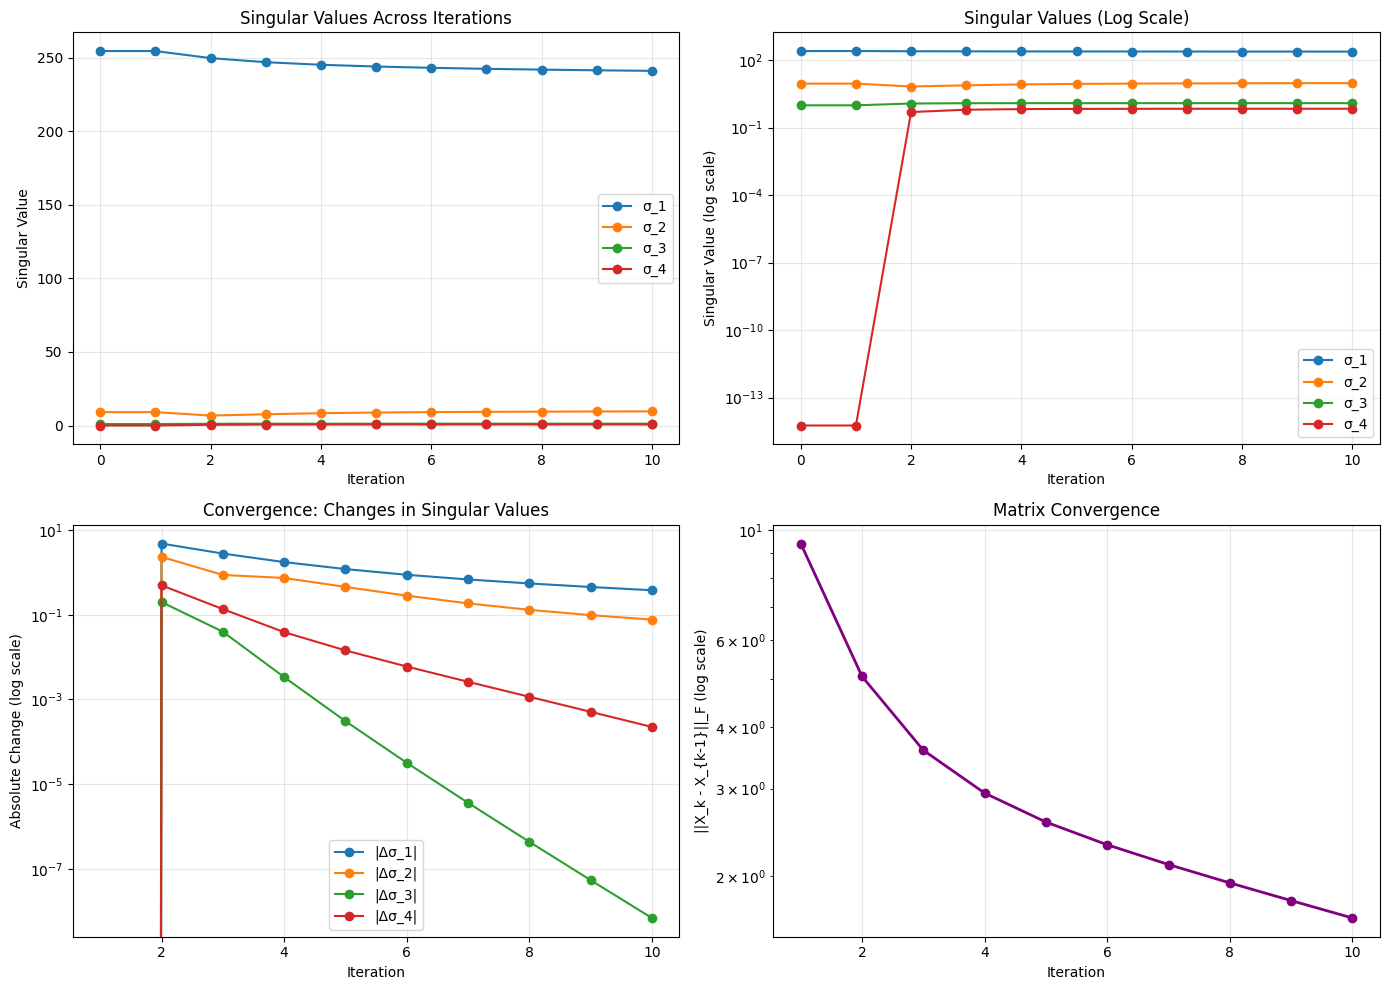


CONCLUSION

Final matrix X10:
[[50.         48.83922904 60.         42.0304351 ]
 [35.16820743 40.         41.30646289 35.        ]
 [65.         62.06259321 75.         53.41029839]
 [38.969525   45.         45.77126204 38.        ]
 [55.         53.2470171  65.         45.82372286]
 [36.60223142 42.         42.99078128 36.        ]]


In [9]:
# Q5(c) Iterate 10 times of the process above

P = np.array(
    [
        [50, np.nan, 60, np.nan],
        [np.nan, 40, np.nan, 35],
        [65, np.nan, 75, np.nan],
        [np.nan, 45, np.nan, 38],
        [55, np.nan, 65, np.nan],
        [np.nan, 42, np.nan, 36],
    ]
)

# Store the mask for missing values
nan_mask = np.isnan(P)

# Initialize X with row means
X = P.copy()
row_means = np.nanmean(X, axis=1)
for i in range(X.shape[0]):
    X[i, nan_mask[i]] = row_means[i]

# Parameters
lambda_shrink = 10
num_iterations = 10

# Store singular values and matrices for each iteration
singular_values_history = []
X_history = [X.copy()]

print("Iteration 0 (Initial X0):")
U, s, VT = np.linalg.svd(X, full_matrices=False)
singular_values_history.append(s)
print(f"Singular values: {s}")
print(f"Matrix:\n{X}\n")

# Perform 10 iterations
for k in range(1, num_iterations + 1):
    # Compute SVD
    U, s, VT = np.linalg.svd(X, full_matrices=False)

    # Apply singular value shrinkage
    s_shrunk = np.maximum(s - lambda_shrink, 0)
    S_shrunk = np.diag(s_shrunk)

    # Reconstruct matrix
    X_shrunk = U @ S_shrunk @ VT

    # Create new X: keep observed values, update missing values
    X = P.copy()
    X[nan_mask] = X_shrunk[nan_mask]

    # Store results
    singular_values_history.append(s)
    X_history.append(X.copy())

    print(f"Iteration {k}:")
    print(f"Singular values: {s}")
    print(f"Matrix:\n{X}\n")

# Convert to array for easier analysis
singular_values_array = np.array(singular_values_history)

print("\n" + "=" * 70)
print("CONVERGENCE ANALYSIS")
print("=" * 70)

# Analyze convergence
print("\nSingular values across iterations:")
print("Iter\t  σ1\t\t  σ2\t\t  σ3\t\t  σ4")
print("-" * 70)
for k in range(num_iterations + 1):
    print(
        f"{k}\t{singular_values_array[k, 0]:.6f}\t{singular_values_array[k, 1]:.6f}\t"
        f"{singular_values_array[k, 2]:.6f}\t{singular_values_array[k, 3]:.6f}"
    )

# Calculate changes between iterations
print("\n\nChanges in singular values (|σ_k - σ_{k-1}|):")
print("Iter\t  Δσ1\t\t  Δσ2\t\t  Δσ3\t\t  Δσ4")
print("-" * 70)
for k in range(1, num_iterations + 1):
    diff = np.abs(singular_values_array[k] - singular_values_array[k - 1])
    print(f"{k}\t{diff[0]:.6f}\t{diff[1]:.6f}\t{diff[2]:.6f}\t{diff[3]:.6f}")

# Calculate matrix Frobenius norm changes
print("\n\nMatrix changes (||X_k - X_{k-1}||_F):")
print("-" * 40)
for k in range(1, num_iterations + 1):
    diff_norm = np.linalg.norm(X_history[k] - X_history[k - 1], "fro")
    print(f"Iteration {k}: {diff_norm:.6f}")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Singular values over iterations
ax1 = axes[0, 0]
for i in range(4):
    ax1.plot(
        range(num_iterations + 1),
        singular_values_array[:, i],
        marker="o",
        label=f"σ_{i+1}",
    )
ax1.set_xlabel("Iteration")
ax1.set_ylabel("Singular Value")
ax1.set_title("Singular Values Across Iterations")
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Log scale for better visualization of smaller singular values
ax2 = axes[0, 1]
for i in range(4):
    ax2.semilogy(
        range(num_iterations + 1),
        singular_values_array[:, i],
        marker="o",
        label=f"σ_{i+1}",
    )
ax2.set_xlabel("Iteration")
ax2.set_ylabel("Singular Value (log scale)")
ax2.set_title("Singular Values (Log Scale)")
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Changes in singular values
ax3 = axes[1, 0]
for i in range(4):
    changes = np.abs(np.diff(singular_values_array[:, i]))
    ax3.semilogy(range(1, num_iterations + 1), changes, marker="o", label=f"|Δσ_{i+1}|")
ax3.set_xlabel("Iteration")
ax3.set_ylabel("Absolute Change (log scale)")
ax3.set_title("Convergence: Changes in Singular Values")
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Matrix Frobenius norm changes
ax4 = axes[1, 1]
matrix_changes = [
    np.linalg.norm(X_history[k] - X_history[k - 1], "fro")
    for k in range(1, num_iterations + 1)
]
ax4.semilogy(
    range(1, num_iterations + 1),
    matrix_changes,
    marker="o",
    color="purple",
    linewidth=2,
)
ax4.set_xlabel("Iteration")
ax4.set_ylabel("||X_k - X_{k-1}||_F (log scale)")
ax4.set_title("Matrix Convergence")
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("CONCLUSION")
print("=" * 70)
print("\nFinal matrix X10:")
print(X_history[10])